In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
class LinearRegression:
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None
    
    def predict(self, X):
        return np.sum((np.dot(X, self.w))) + self.b

    def evaluate(self, X, y):
        # y_hat = self.predict(X)
        # mse = np.mean((y_hat - y)**2)
        # return mse
        result = 0
        for i in range(len(y)):
            result += (self.predict(X.iloc[i]) - y.iloc[i])**2
        return result/len(y)

    # def compute_gradient(self, X, y):
    #     dw = 2*np.dot(X.T,(self.predict(X)-y)) #tích vô hướng của X và y_hat - y
    #     db = 2*np.sum(self.predict(X)-y)
    #     return dw, db

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 1
        losses = []

        # dw, db = self.compute_gradient(X, y)
        # self.w = self.w - self.learning_rate * dw
        # self.b = self.b - self.learning_rate * db
        for i in range(self.epochs):
          for j in range(m):
            y_pred = self.predict(X.iloc[j])
            dw = np.array(X.iloc[j])
            dw = (y_pred - y.iloc[j]) * dw
            db = y_pred - y.iloc[j]
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
          losses.append(self.evaluate(X, y))
        return losses

    def plot_regression_line(self, X, y):
        plt.scatter(X, y, color="blue", label="Data points")
        y_pred = [self.predict(X.iloc[i]) for i in range(len(X))]
        plt.plot(X, y_pred, color="red", label="Regression Line")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.show()
                

In [33]:
# data = np.genfromtxt('advertising.csv', delimiter=",", skip_header=1)

# X = data[:, :-1]
# y = data[:, -1]

# # Train data
# X_train = X[:int(len(X)*0.8)]
# y_train = y[:int(len(y)*0.8)]

# # Test data
# X_test = X[int(len(X)*0.8):]
# y_test = y[int(len(y)*0.8):]

# print(X_test[:,0].shape)
# print(y_test.shape)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load data chia tỷ lệ: Train 80% và Test 20%
dataset = pd.read_csv('advertising.csv')
X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

MSE: 4.335158187432422


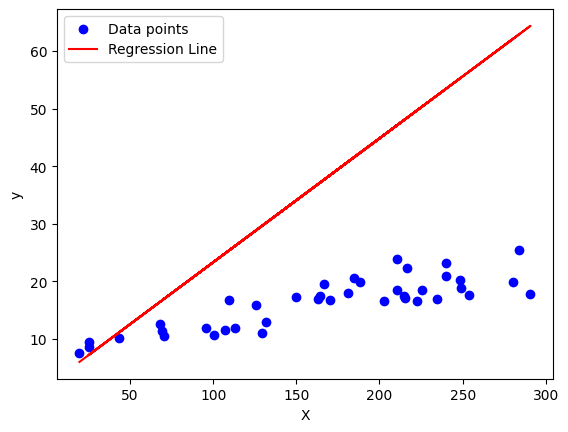

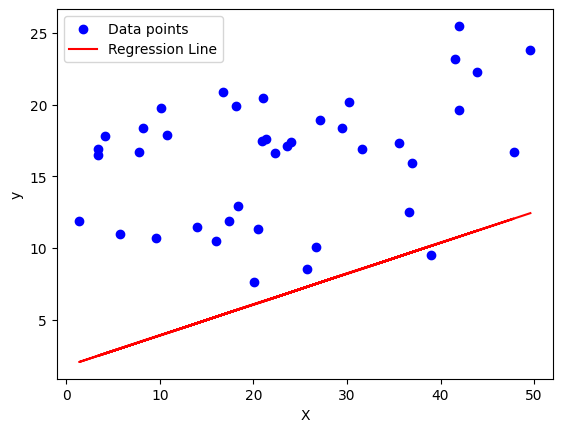

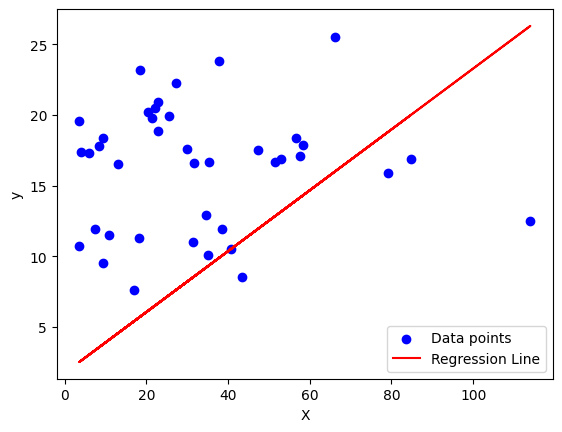

In [35]:
model = LinearRegression(learning_rate=0.00001, epochs=1000)
model.fit(X_train, y_train)

print(f'MSE: {model.evaluate(X_test, y_test)}')
model.plot_regression_line(X_test["TV"], y_test)
model.plot_regression_line(X_test["Radio"], y_test)
model.plot_regression_line(X_test["Newspaper"], y_test)